![](https://github.com/dkataiev/skillfactory_rds/raw/master/resources/img/tripadvisor-logo.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline является хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./data/kaggle_task.csv
./data/ta_data.csv
./data/main_task.csv
./data/sample_submission.csv


In [207]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [208]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [209]:
DATA_DIR = './data'
df_train = pd.read_csv(DATA_DIR + '/main_task.csv')
df_test = pd.read_csv(DATA_DIR + '/kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR + '/sample_submission.csv')

In [210]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [211]:
df_train.head(5)

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [212]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [213]:
df_test.head(5)

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918  
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944  
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638  
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417  
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354

In [214]:
sample_submission.head(5)

Restaurant_id  Rating
0          id_0     2.0
1          id_1     2.5
2          id_2     4.0
3          id_3     1.0
4          id_4     4.0

In [215]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [216]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* `City`: Город 
* `Cuisine Style`: Кухня
* `Ranking`: Ранг ресторана относительно других ресторанов в этом городе
* `Price Range`: Цены в ресторане в 3 категориях
* `Number of Reviews`: Количество отзывов
* `Reviews`: 2 последних отзыва и даты этих отзывов
* `URL_TA`: страница ресторана на 'www.tripadvisor.com' 
* `ID_TA`: ID ресторана в TripAdvisor
* `Rating`: Рейтинг ресторана

In [218]:
data.sample(5)

Restaurant_id       City  \
16466       id_2554  Amsterdam   
43650       id_5639       Rome   
4976        id_4976  Stockholm   
14344       id_2835      Paris   
4863        id_4863       Oslo   

                                           Cuisine Style  Ranking Price Range  \
16466                   ['Italian', 'Pizza', 'European']   2561.0         NaN   
43650                                                NaN   5641.0         NaN   
4976                                                 NaN   1697.0         NaN   
14344  ['French', 'Cafe', 'European', 'Vegetarian Fri...   2836.0    $$ - $$$   
4863                          ['Sushi', 'Asian', 'Thai']   1038.0         NaN   

       Number of Reviews                                            Reviews  \
16466               33.0  [['Excellent Food', 'delicious!'], ['05/21/201...   
43650                2.0                                           [[], []]   
4976                 3.0  [['Awesome greeting, Great atmosphere, Good f....   
14344              859.0  [['Just ok', 'Christmas lunch'], ['01/04/2018'...   
4863                 2.0  [['Quite ok, and not too expencieve'], ['08/30...   

                                                  URL_TA      ID_TA  sample  \
16466  /Restaurant_Review-g188590-d753254-Reviews-Ang...    d753254       1   
43650  /Restaurant_Review-g187791-d10790633-Reviews-E...  d10790633       1   
4976   /Restaurant_Review-g189852-d1051177-Reviews-Pr...   d1051177       0   
14344  /Restaurant_Review-g187147-d6885953-Reviews-Ca...   d6885953       1   
4863   /Restaurant_Review-g190479-d10214662-Reviews-S...  d10214662       0   

       Rating  
16466     3.5  
43650     5.0  
4976      0.0  
14344     3.5  
4863      0.0

In [219]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [220]:
# Для примера я возьму столбец Number of Reviews
def preproc_number_of_reviews(df):
    # Вынесем информацию о наличии пропуска как отдельный признак
    df['Number_of_Reviews_isNAN'] = pd.isna(df['Number of Reviews']).astype('uint8')
    # Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
    df['Number of Reviews'].fillna(0, inplace=True)
    return df

data = preproc_number_of_reviews(data)

In [221]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

### 2. Обработка признаков

#### Возьмем признак "Price Range".

In [222]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [223]:
def preproc_price_range(df):
    # Заменим категориальный признак числами
    df['Price Range'].replace(to_replace={ '$': 1, '$$ - $$$': 2, '$$$$': 3}, inplace=True)
    # Сохраним данные о записях, где не был указан уровень цен.
    df['Price_Range_isNAN'] = pd.isna(df['Price Range']).astype('uint8')
    # Заполним пропуски, пока что воспользуемся просто медианой.
    df['Price Range'].fillna(df['Price Range'].median(), inplace=True)
    return df

data = preproc_price_range(data)

In [224]:
data.sample(5)

Restaurant_id    City  \
42638       id_1919  Vienna   
45038        id_878  London   
10884       id_5524  Madrid   
35769      id_11682   Paris   
35254        id_926  Athens   

                                           Cuisine Style  Ranking  \
42638  ['Japanese', 'Sushi', 'Asian', 'Vegetarian Fri...   1921.0   
45038  ['Scandinavian', 'Vegetarian Friendly', 'Vegan...    880.0   
10884                                                NaN   5527.0   
35769                              ['Japanese', 'Sushi']  11684.0   
35254                                  ['Vegan Options']    928.0   

       Price Range  Number of Reviews  \
42638          2.0               72.0   
45038          2.0              192.0   
10884          2.0               14.0   
35769          2.0               12.0   
35254          1.0                7.0   

                                                 Reviews  \
42638  [['Not worth your money', 'Loved it!'], ['12/1...   
45038  [['Need to reset the thermostat', 'Great Resta...   
10884                                           [[], []]   
35769                                           [[], []]   
35254  [['I love it!', 'Nice vegan store'], ['08/19/2...   

                                                  URL_TA      ID_TA  sample  \
42638  /Restaurant_Review-g190454-d1988889-Reviews-Ak...   d1988889       1   
45038  /Restaurant_Review-g186338-d11829564-Reviews-A...  d11829564       1   
10884  /Restaurant_Review-g187514-d9742180-Reviews-Re...   d9742180       1   
35769  /Restaurant_Review-g187147-d6420527-Reviews-Su...   d6420527       1   
35254  /Restaurant_Review-g189400-d8707341-Reviews-Ba...   d8707341       1   

       Rating  Number_of_Reviews_isNAN  Price_Range_isNAN  
42638     4.0                        0                  0  
45038     4.5                        0                  0  
10884     3.5                        0                  1  
35769     3.5                        0                  1  
35254     4.5                        0                  0

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

#### Возьмем следующий признак "Cuisine Style".

Для начала добавим к записям признак с колличеством представленых типов кухонь. Если в данных отсутствует информация о типах кухонь, то считаем, что в этом ресторане предлагается только один тип кухни. Так же пометим записи, где не укзан тип кухни.

In [225]:
def string_to_list(s):
    return s[1:-1].replace("'", "").split(', ')

def count_styles(s):
    return len(string_to_list(s)) if s is not np.nan else 1

def get_cuisines_list(df):
    cuisines = set()
    for cuisine in df['Cuisine Style'].dropna().values:
        cuisines.update(string_to_list(cuisine))
    return cuisines

def update_cuisines_rating(cuisine_styles, cuisines_ratings):
        for style in cuisine_styles:
            cuisines_ratings[style] = cuisines_ratings[style] + 1

def calc_cuisines_ratings(df, cuisines):
    cuisines_ratings = {}
    for cuisine in cuisines:
        cuisines_ratings[cuisine] = 0
    
    for cuisine in df['Cuisine Style'].dropna().values:
        update_cuisines_rating(string_to_list(cuisine), cuisines_ratings)
    
    return cuisines_ratings

def preproc_cuisine_style(df):
    # добавим к записям признак с колличеством представленых типов кухонь
    df['Cuisine Style Count'] = df['Cuisine Style'].apply(count_styles)
    # пометим записи, где не укзан тип кухни.
    df['Cuisine_Style_isNAN'] = pd.isna(df['Cuisine Style']).astype('uint8')

    # отдельными признаками добавим типы кухни, которые представлены хотя бы в 1% ресторанов.
    # соберем список всех кухонь представленых в датасете.
    cuisines_list = get_cuisines_list(df)

    # соберем данные о том, в скольки ресторанах представлена каждая кухня.
    cuisines_rating = calc_cuisines_ratings(df, cuisines_list)

    # выделим две группы кухонь те которые представлены хотя бы в 1% ресторанов и остальные
    top_cuisines = []
    low_cuisines = []
    for cuisine in cuisines_rating:
        if cuisines_rating[cuisine] > len(data) * .01:
            top_cuisines.append(cuisine)
        else:
            low_cuisines.append(cuisine)

    # создадим отдельные признаки для кухонь представленых хотя бы в 1%
    def top_cuisine_present(x):
        if pd.isna(x): 
            return 0
        return 1 if cuisine in x else 0

    for cuisine in top_cuisines:
        dummy = df['Cuisine Style'].apply(top_cuisine_present)
        df['Cuisine_' + cuisine] = dummy

    # для остальных добавим признак Cuisine_Other
    def is_low_cuisine_present(x):
        if pd.isna(x): 
            return 0
        for cuisine in low_cuisines:
            if cuisine in x:
                return 1
        return 0

    df['Cuisine_Other'] = df['Cuisine Style'].apply(is_low_cuisine_present)
    
    return df

data = preproc_cuisine_style(data)

In [226]:
data.sample(5)

Restaurant_id       City  \
43244        id_322     Prague   
30958       id_2325  Amsterdam   
1495        id_1495      Milan   
13443       id_3475     Lisbon   
22972        id_152     Berlin   

                                           Cuisine Style  Ranking  \
43244  ['Mediterranean', 'Bar', 'International', 'Eur...    323.0   
30958  ['Bar', 'International', 'European', 'Grill', ...   2331.0   
1495                                                 NaN   4871.0   
13443                                                NaN   3479.0   
22972  ['Indian', 'Asian', 'Vegetarian Friendly', 'Ve...    153.0   

       Price Range  Number of Reviews  \
43244          2.0              180.0   
30958          2.0               38.0   
1495           2.0                4.0   
13443          2.0                4.0   
22972          2.0              295.0   

                                                 Reviews  \
43244  [['Best restaurant we visited in Prague', 'Gre...   
30958  [['Good food and nice atmosphere', 'Lovely set...   
1495                                            [[], []]   
13443  [['Popular restaurant for fish connoisseur!', ...   
22972  [['Mini-trip to India', 'An Indian gem'], ['12...   

                                                  URL_TA      ID_TA  sample  \
43244  /Restaurant_Review-g274707-d7079304-Reviews-Ta...   d7079304       1   
30958  /Restaurant_Review-g188590-d6767663-Reviews-Ca...   d6767663       1   
1495   /Restaurant_Review-g187849-d8341204-Reviews-Ca...   d8341204       0   
13443  /Restaurant_Review-g189158-d10004354-Reviews-M...  d10004354       1   
22972  /Restaurant_Review-g187323-d10263210-Reviews-N...  d10263210       1   

       ...  Cuisine_Portuguese  Cuisine_Gastropub  Cuisine_Contemporary  \
43244  ...                   0                  0                     0   
30958  ...                   0                  0                     0   
1495   ...                   0                  0                     0   
13443  ...                   0                  0                     0   
22972  ...                   0                  0                     0   

       Cuisine_Healthy  Cuisine_Vegan Options  Cuisine_German  \
43244                0                      0               0   
30958                0                      0               0   
1495                 0                      0               0   
13443                0                      0               0   
22972                0                      1               0   

       Cuisine_Central European  Cuisine_International  Cuisine_Thai  \
43244                         0                      1             0   
30958                         0                      1             0   
1495                          0                      0             0   
13443                         0                      0             0   
22972                         0                      0             0   

       Cuisine_Other  
43244              0  
30958              0  
1495               0  
13443              0  
22972              0  

[5 rows x 59 columns]

#### Возьмем следующий признак "Reviews".

Добавим признаки с датами последнего и предпоследнего отзывов, а также колличество дней между ними.

In [227]:
def get_dates_list(x):
    dates = x.split('], [')[1]
    dates = dates[:-2]
    dates = dates.replace("'", "")
    return dates.split(', ')

def get_penultimate_review(x):
    dates = get_dates_list(x)
    return pd.to_datetime(dates[-1]) if len(dates) >= 1 else np.NaN

def get_last_review(x):
    dates = get_dates_list(x)
    return pd.to_datetime(dates[0]) if len(dates) >= 1 else np.NaN

def preproc_reviews(df):
    # заполним пропуски пустыми значениями
    df['Reviews'].fillna('[[], []]', inplace=True)

    # отметим записи коментарии в которых отсутствуют
    df['Reviews_NA'] = (df['Reviews'] == '[[], []]').astype(int)

    # создадим признаки с датами двух последних коментариев
    df['Penultimate_Review'] = df['Reviews'].apply(lambda x: get_penultimate_review(x))
    df['Last_Review'] = df['Reviews'].apply(lambda x: get_last_review(x))

    # создадим признак количеством дней прошедшими между двумя последними коментариями
    df = df.assign(Review_Time_Delta = lambda x: (x['Last_Review'] - x['Penultimate_Review']).dt.days)

    # звполним пустые записи
    df['Review_Time_Delta'] = df['Review_Time_Delta'].fillna(0)
    return df

data = preproc_reviews(data)

In [228]:
data.sample(5)

Restaurant_id      City  \
49917      id_14374    London   
243          id_243     Milan   
2120        id_2120  Brussels   
33444        id_562    Munich   
44808       id_7290    London   

                                           Cuisine Style  Ranking  \
49917  ['Indian', 'Asian', 'Balti', 'Eastern European...  14385.0   
243                                 ['Italian', 'Pizza']   2375.0   
2120                      ['Japanese', 'Sushi', 'Asian']   1894.0   
33444  ['German', 'Austrian', 'European', 'Central Eu...    567.0   
44808  ['Pizza', 'International', 'Delicatessen', 'Co...   7299.0   

       Price Range  Number of Reviews  \
49917          2.0               27.0   
243            1.0               32.0   
2120           2.0               47.0   
33444          2.0               86.0   
44808          1.0                6.0   

                                                 Reviews  \
49917  [['Tired and dated decor but quite good food.'...   
243    [['Simple yet Satisfying meal', 'Absolutely pe...   
2120   [['Belgian BenyHana', 'Not even edamame!'], ['...   
33444  [['A cozy neighborhood Austrian restaurant', '...   
44808  [['Opened up immediately after Christmas', 'Su...   

                                                  URL_TA     ID_TA  sample  \
49917  /Restaurant_Review-g186338-d953786-Reviews-Red...   d953786       1   
243    /Restaurant_Review-g187849-d5017894-Reviews-La...  d5017894       0   
2120   /Restaurant_Review-g188644-d941465-Reviews-Mit...   d941465       0   
33444  /Restaurant_Review-g187309-d1791113-Reviews-Wa...  d1791113       1   
44808  /Restaurant_Review-g186338-d8424828-Reviews-Th...  d8424828       1   

       ...  Cuisine_Vegan Options  Cuisine_German  Cuisine_Central European  \
49917  ...                      0               0                         0   
243    ...                      0               0                         0   
2120   ...                      0               0                         0   
33444  ...                      0               1                         1   
44808  ...                      0               0                         0   

       Cuisine_International  Cuisine_Thai  Cuisine_Other  Reviews_NA  \
49917                      0             0              1           0   
243                        0             0              0           0   
2120                       0             0              0           0   
33444                      0             0              1           0   
44808                      1             0              1           0   

       Penultimate_Review  Last_Review  Review_Time_Delta  
49917          2017-12-20   2017-11-23              -27.0  
243            2015-09-09   2016-07-03              298.0  
2120           2017-01-19   2017-04-26               97.0  
33444          2017-09-30   2017-06-28              -94.0  
44808          2017-06-23   2018-01-03              194.0  

[5 rows x 63 columns]

Посмотрим какие признаки у нас могут быть категориальными.

In [229]:
data.nunique(dropna=False)

Restaurant_id         13094
City                     31
Cuisine Style         10732
Ranking               12975
Price Range               3
                      ...  
Cuisine_Other             2
Reviews_NA                2
Penultimate_Review     2279
Last_Review            1977
Review_Time_Delta      1650
Length: 63, dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [230]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na

def preproc_cities(df):

    # Прежде, чем заменять признак 'City' dummy-переменными, сохраним на будущее некоторую информацию.
    # Соберем среднее значение критерия Ranking по городам
    stats_by_city = df.groupby(['City']).median()   
    
    # Для каждой строчки добавим признак с отклонением от среднего значения соответствующего города
    df['Ranking_Delta'] = df.apply(lambda x: x['Ranking'] - stats_by_city['Ranking'][x['City']], axis=1)
    df['Cuisine_Style_Count_Delta'] = df.apply(lambda x: x['Cuisine Style Count'] - stats_by_city['Cuisine Style Count'][x['City']], axis=1)
    df['Price_Range_Delta'] = df.apply(lambda x: x['Price Range'] - stats_by_city['Price Range'][x['City']], axis=1)
    df['Reviews_Number_City_Median_Delta'] = df.apply(lambda x: x['Number of Reviews'] - stats_by_city['Number of Reviews'][x['City']], axis=1)

    df = pd.get_dummies(df, columns=['City'], dummy_na=True)
    return df

data = preproc_cities(data)

In [231]:
data.sample()

Restaurant_id                       Cuisine Style  Ranking  Price Range  \
17689      id_10219  ['Italian', 'Vegetarian Friendly']  10228.0          2.0   

       Number of Reviews                                            Reviews  \
17689              112.0  [['Lovely meal', 'Wonderful Food Experience !'...   

                                                  URL_TA     ID_TA  sample  \
17689  /Restaurant_Review-g186338-d2310143-Reviews-Th...  d2310143       1   

       Rating  ...  City_Oporto  City_Oslo  City_Paris  City_Prague  \
17689     4.0  ...            0          0           0            0   

       City_Rome  City_Stockholm  City_Vienna  City_Warsaw  City_Zurich  \
17689          0               0            0            0            0   

       City_nan  
17689         0  

[1 rows x 98 columns]

Попробуем по тексту двух последних коментариев понять были ли они положительными либо отрицательными.

In [232]:
data['Reviews'].sample(5)

12802    [['Great cocktails, mature vibe', 'This is the...
11600    [['Sit outside facing the church and people w....
19970    [['Nice!!', 'Great cozy pub with excellent cho...
37177                                             [[], []]
36578    [['Great choice of pasta!', 'The largest choic...
Name: Reviews, dtype: object

In [233]:
chars_to_replace = "',.!?&-+/\""

def get_reviews_words(x):
    reviews = x.split('], [')[0]
    reviews = reviews[2:]
    reviews = reviews.split("', '")
    if len(reviews) == 1:
        return []

    words = set()
    for review in reviews:
        for ch in chars_to_replace:
            review = review.replace(ch, '')
        review = review.lower()
    return words

def count_review_words(x):
    words = get_reviews_words(x)

# для начала соберем список слов которые есть в коментариях.
# data['Reviews'].sample(10).apply(count_review_words)
# в процессе выяснилось, что подавляющее большинство коментариев положительные, пока отложим это

### Это "жжж" неспроста

В датасете у нас есть ссылка страничку ресторана в системе TripAdrisor. Рассмотрим несколько страниц и попробуем выделить потенциально полезную нам информацию.

Опишем необходимые для парсинга функции

In [234]:
import requests

from lxml import html
from bs4 import BeautifulSoup
from multiprocessing import Pool
from datetime import datetime

TRIP_ADVISOR_URL_TEMPLATE = 'https://www.tripadvisor.com{}'

def parse_ratings_and_reviews(node, result):
    rating_block = node.find('div').findAll('div', recursive=False)[2]
    rating_block = rating_block.findAll('div', recursive=False)
    if len(rating_block) < 2:
        return

    ratings = rating_block[1].findAll('div')
    for rating in ratings:
        spans = rating.findAll('span', recursive=False)
        title = spans[1].text.lower()
        value = spans[2].find('span').attrs['class'][1].split('_')[1]
        result[title] = int(value)

def parse_location_and_contact(node):
    location_block = node.find('div').find('div')
    location_block = location_block.findAll('div', recursive=False)[1]
    distance_el = location_block.find('b')
    if distance_el is None:
        return np.NaN
    return float(distance_el.text.split()[0])

def parse_details_block(node, result):
    if node is None:
        return

    result['is_verified'] = 1 if node.find('span', {'class': 'ui_icon verified-checkmark'}) is not None else 0
    result['has_phone_number'] = 1 if node.find('a', string='+ Add phone number') is None else 0
    result['has_hours'] = 1 if node.find('a', string='+ Add hours') is None else 0
    result['has_website'] = 1 if node.find('a', string='+ Add website') is None else 0
    result['has_menu'] = 1 if node.find('a', string='Menu') is not None else 0
        

def collect_page_data(html, result):
    soup = BeautifulSoup(html)
    overview_tabs = soup.find('div', {'data-tab': 'TABS_OVERVIEW'})
    if overview_tabs is None:
        return

    overview_columns = overview_tabs.findAll('div', {'class':'ui_column'})
    parse_ratings_and_reviews(overview_columns[0], result)
    parse_details_block(overview_columns[1], result)

    result['distance'] = parse_location_and_contact(overview_columns[2])
    result['has_tcAward'] = 1 if soup.find('img', {'class': 'tcAward'}) is not None else 0

def current_time():
    return datetime.now().strftime("%H:%M:%S")

def get_id_from_url(url):
    return url.split('-')[2]

def parse_site_page(url):
    result = {}
    result['id_ta'] = get_id_from_url(url)
    ta_url = TRIP_ADVISOR_URL_TEMPLATE.format(url)
    print(url)
    r = requests.get(ta_url, stream=True)
    print('Done')
    collect_page_data(r.text, result)
    return result

def process_ta_urls(x):
    return x.apply(parse_site_page)



In [235]:
def parallelize_processing(df, func, n_cores=8):
    pool = Pool(n_cores)
    df_split = np.array_split(df, n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# print("Started at:", current_time())

# start = 0
# step = 5000
# stop = len(data)
# n_cores = 16

# for i in range(start, stop, step):
#     print('[{}] Getting records {}:{}'.format(current_time(), i, i + step))
#     pages_data = parallelize_processing(data['URL_TA'][i:i+step], process_ta_urls, n_cores=n_cores)
#     site_df = pd.DataFrame(pages_data.values.tolist())
#     site_df.to_csv('ta_data/data_{}-{}.csv'.format(i, i+step))    

# print("Finished at:", current_time())

In [236]:

start = 0
step = 5000
stop = len(data)

for i in range(start, stop, step):
    data['URL_TA'][i:i+step].to_csv('./grabber/urls/urls_{}-{}.csv'.format(i, i+step))


FileNotFoundError: [Errno 2] No such file or directory: 'urls/urls_0-5000.csv'

Все было прекрасно, но jupyther notebook вешается при попытке обработать все ссылки.

Вынесем код в отдельный скрипт и запустим.

![](https://github.com/dkataiev/skillfactory_rds/raw/master/resources/img/several-song-filled-hours-later.jpg)

Превратим набор JSON-файлов в CSV-формат для дальнейшего удобства рабты с ними.

In [165]:
# import json

# chunks = []

# for dirname, _, filenames in os.walk('./grabber/ta_data'):
#     for filename in filenames:
#         with open(os.path.join(dirname, filename)) as f:
#             data_chunk = json.load(f)
#             chunks.append(pd.DataFrame(data_chunk))

# ta_df = pd.concat(chunks, ignore_index=True)
# ta_df.info()
# ta_df.sample(10)

Почистим полученные данные и подготовим их к дальнейшей работе.

#### Заполним пропуски

Признаки 
* food
* service
* value
* atmosphere 

содержат оценку в конкретной категории. На их основе мы вычислим суммарный рейтинг, поэтому забьем пропуски нулями.

Слудующие признаки содержат номинативные показатели, нет значения - нет показателя, забиваем нолями.

* is_verified
* has_phone_number
* has_hours
* has_website
* has_menu
* has_tcAward




In [166]:
# ta_df.fillna({
#     'food':0,
#     'service':0,
#     'value':0,
#     'atmosphere':0,
#     'is_verified':0,
#     'has_phone_number':0,
#     'has_hours':0,
#     'has_website':0,
#     'has_menu':0,
#     'has_tcAward':0},
#     inplace=True)

# ta_df.info()

С признаком 'distance' все немного сложнее, это раастояние от некоего культурного центра. 

Пометим записи, где он отсутствует новым признаком а потом заменим пропуски на -1 что бы отличать от реального расстояния

In [167]:
# ta_df['distance_isNAN'] = pd.isna(ta_df['distance']).astype('uint8')
# ta_df.fillna({'distance':-1},inplace=True)
# ta_df.info()

In [168]:
# ta_df.sample(10)

Добавим суммарный рейтинг на основе следующих признаков:

* food
* service
* value
* atmosphere


In [169]:
# ta_df['ratings_summary'] = ta_df.apply(lambda x: x['food'] + x['service'] + x['value'] + x['atmosphere'], axis=1)
# ta_df.sample(5)

In [170]:
# # Удалим ненужные нам колонки
# ta_df.drop(columns=['id', 'ta_url'], inplace=True)
# ta_df.info()

In [171]:
# # Сохраним подготовленные данные в формате csv.
# ta_df.to_csv('./data/ta_data.csv', index=False)

Далее будем работать с данными сайта используя выгруженный csv файл.

In [172]:
ta_df = pd.read_csv(DATA_DIR + '/ta_data.csv')
ta_df.info()
ta_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ta_id             50000 non-null  object 
 1   food              50000 non-null  float64
 2   service           50000 non-null  float64
 3   value             50000 non-null  float64
 4   is_verified       50000 non-null  float64
 5   has_phone_number  50000 non-null  float64
 6   has_hours         50000 non-null  float64
 7   has_website       50000 non-null  float64
 8   has_menu          50000 non-null  float64
 9   distance          50000 non-null  float64
 10  has_tcAward       50000 non-null  float64
 11  atmosphere        50000 non-null  float64
 12  distance_isNAN    50000 non-null  int64  
 13  ratings_summary   50000 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 5.3+ MB


ta_id  food  service  value  is_verified  has_phone_number  \
34378  d7377725  45.0     45.0   35.0          0.0               1.0   
45893  d5519810  40.0     45.0   45.0          0.0               1.0   
32604  d1516641  45.0     45.0   45.0          0.0               1.0   
38392  d2520538  45.0     45.0   40.0          0.0               1.0   
30887  d1037035  40.0     35.0   35.0          0.0               1.0   

       has_hours  has_website  has_menu  distance  has_tcAward  atmosphere  \
34378        1.0          1.0       0.0      -1.0          0.0         0.0   
45893        1.0          1.0       0.0       1.6          0.0         0.0   
32604        1.0          1.0       0.0       0.3          0.0        45.0   
38392        1.0          1.0       0.0      -1.0          0.0        40.0   
30887        1.0          1.0       0.0       0.2          0.0        40.0   

       distance_isNAN  ratings_summary  
34378               1            125.0  
45893               0            130.0  
32604               0            180.0  
38392               1            170.0  
30887               0            150.0

Добавим данные полученные с сайта к основному датасету.

In [173]:
def add_site_data(df):
    return pd.merge(df, ta_df, left_on='ID_TA', right_on='ta_id')

data = add_site_data(data)

In [174]:
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50074 entries, 0 to 50073
Columns: 112 entries, Restaurant_id to ratings_summary
dtypes: datetime64[ns](2), float64(20), int64(49), object(6), uint8(35)
memory usage: 31.5+ MB


Restaurant_id                                      Cuisine Style  \
674          id_671                                        ['Spanish']   
11793      id_12013                   ['Italian', 'Pizza', 'European']   
16664       id_1028  ['Cafe', 'British', 'Vegetarian Friendly', 'Gl...   
36788       id_1351  ['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...   
19344       id_5108                                                NaN   

       Ranking  Price Range  Number of Reviews  \
674     7806.0          2.0               13.0   
11793  12023.0          2.0               18.0   
16664   1030.0          2.0              147.0   
36788   1352.0          2.0               61.0   
19344   5110.0          2.0                0.0   

                                                 Reviews  \
674                                             [[], []]   
11793  [['The hotel restaurant for Marriott Media Va....   
16664  [['Terrace for Coffee - Grubby', 'Great food o...   
36788  [['Great food. Amazing Quality and Quick Deli....   
19344  [['Good choice on the not so hip side of Wars....   

                                                  URL_TA     ID_TA  sample  \
674    /Restaurant_Review-g187514-d4242121-Reviews-El...  d4242121       0   
11793  /Restaurant_Review-g186338-d4168224-Reviews-Re...  d4168224       1   
16664  /Restaurant_Review-g186605-d3803807-Reviews-Ma...  d3803807       1   
36788  /Restaurant_Review-g187147-d7799874-Reviews-In...  d7799874       1   
19344  /Restaurant_Review-g187323-d3842071-Reviews-Ca...  d3842071       1   

       Rating  ...  is_verified  has_phone_number  has_hours  has_website  \
674       0.0  ...          0.0               1.0        1.0          1.0   
11793     3.5  ...          0.0               1.0        1.0          1.0   
16664     3.5  ...          0.0               1.0        1.0          1.0   
36788     4.5  ...          0.0               1.0        1.0          1.0   
19344     4.0  ...          0.0               1.0        1.0          1.0   

       has_menu  distance  has_tcAward  atmosphere  distance_isNAN  \
674         0.0       0.4          0.0        35.0               0   
11793       0.0       1.5          0.0         0.0               0   
16664       0.0       0.0          0.0        35.0               0   
36788       0.0      -1.0          1.0         0.0               1   
19344       0.0       1.8          0.0         0.0               0   

       ratings_summary  
674              115.0  
11793             80.0  
16664            140.0  
36788            135.0  
19344              0.0  

[5 rows x 112 columns]

Удалим все признаки, не являющиесь числовыми.

In [175]:
object_cols = list(data.select_dtypes(include=['object', 'datetime64[ns]', 'timedelta64[ns]']).columns)
data = data.drop(labels=object_cols, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50074 entries, 0 to 50073
Columns: 104 entries, Ranking to ratings_summary
dtypes: float64(20), int64(49), uint8(35)
memory usage: 28.4 MB



![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50074 entries, 0 to 50073
Columns: 104 entries, Ranking to ratings_summary
dtypes: float64(20), int64(49), uint8(35)
memory usage: 28.4 MB


Взглянем на оставшиесь признакми в поисках выбросов.



### Посмотрим распределение признака

-0.016486622959856

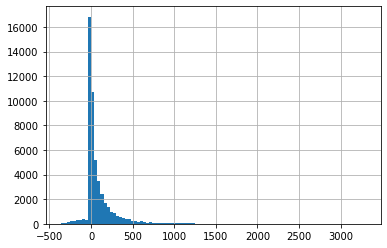

In [177]:
#### Review_Time_Delta
data['Review_Time_Delta'].hist(bins=100)

data['Review_Time_Delta'].corr(data['Rating'])

#### Review_Time_Delta

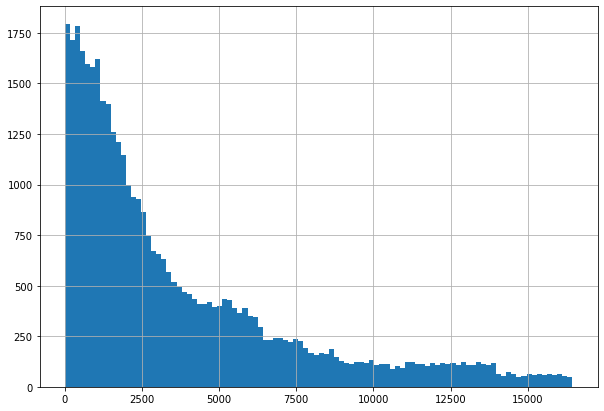

In [178]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

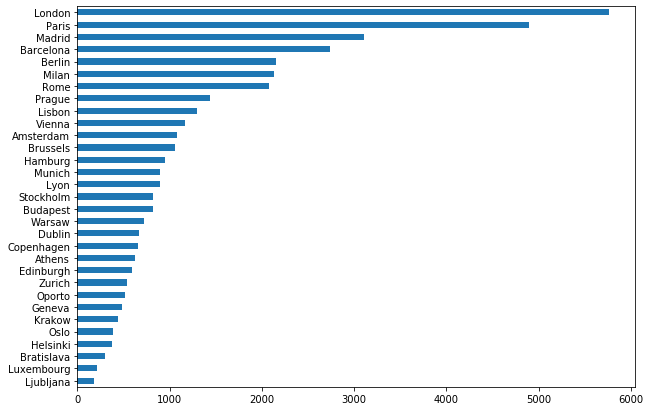

In [179]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

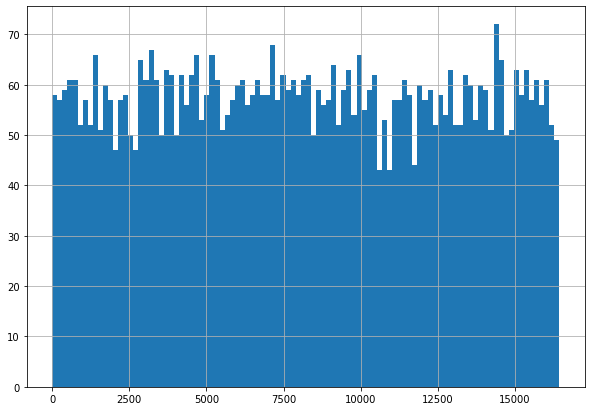

In [180]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

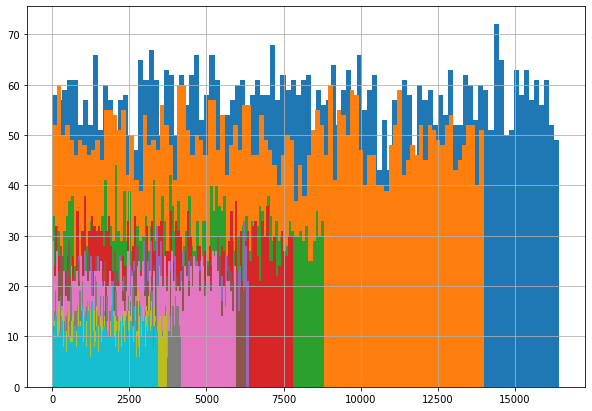

In [181]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

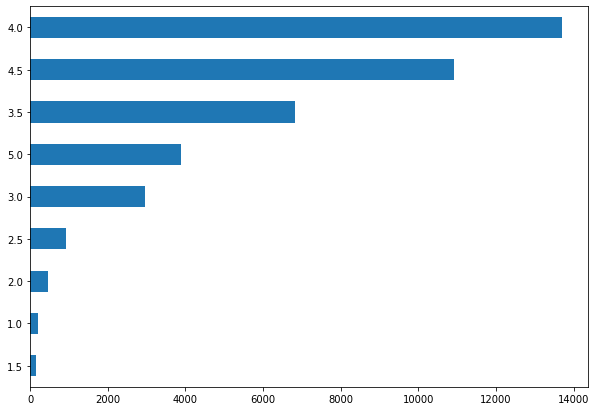

In [182]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

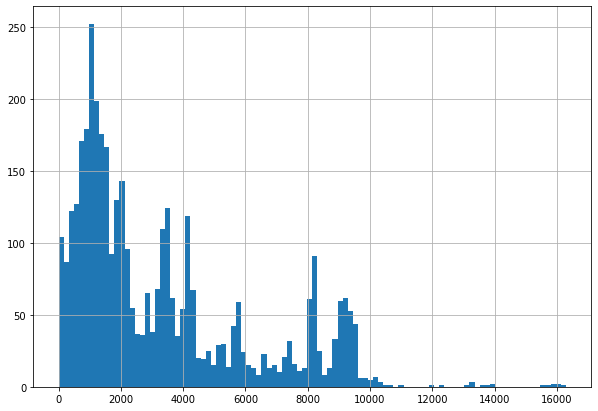

In [183]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

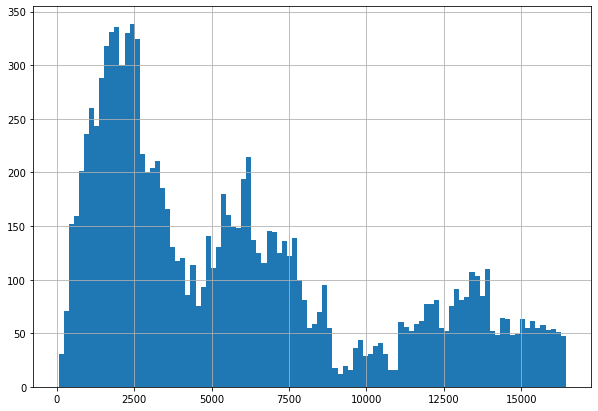

In [184]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

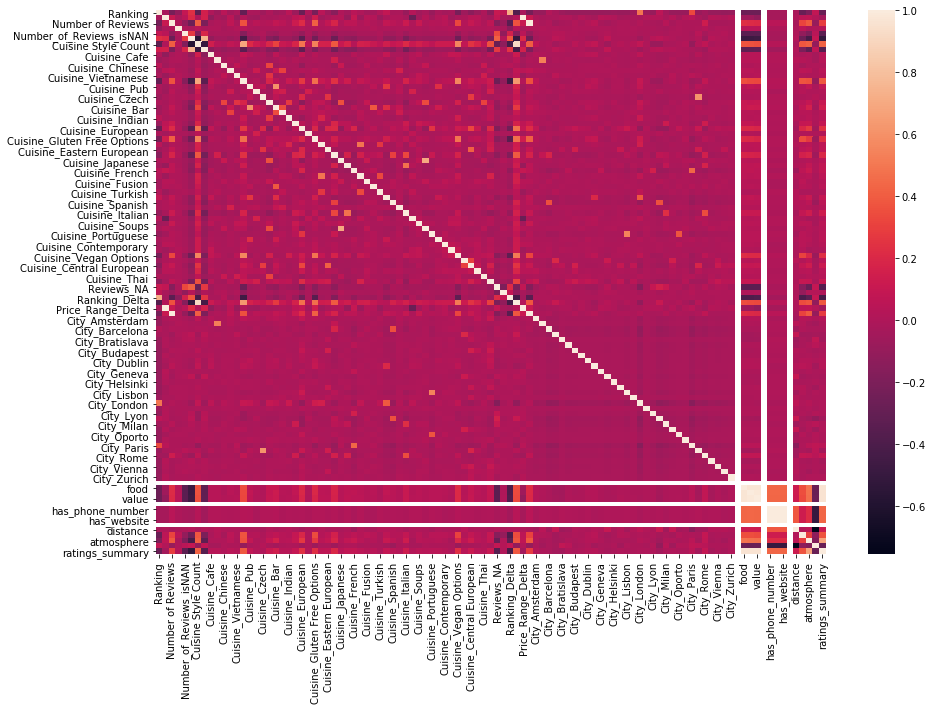

In [185]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [186]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [187]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    df_output = preproc_number_of_reviews(df_output)
    
    df_output = preproc_price_range(df_output)

    df_output = preproc_cuisine_style(df_output)

    df_output = preproc_reviews(df_output)

    df_output = preproc_cities(df_output)

    df_output = add_site_data(df_output)
    
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)    

    object_cols = list(df_output.select_dtypes(include=['object', 'datetime64[ns]', 'timedelta64[ns]']).columns)
    df_output = df_output.drop(labels=object_cols, axis=1)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [188]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

Ranking  Price Range  Number of Reviews  sample  Rating  \
25330   2759.0          2.0               52.0       1     4.0   
40718  12317.0          2.0                5.0       1     3.5   
33986    954.0          2.0                0.0       1     5.0   
11914   8309.0          2.0               10.0       1     4.5   
26366   7005.0          2.0               11.0       1     4.5   
28224  12842.0          2.0              273.0       1     3.0   
12253   1760.0          2.0                2.0       1     3.0   
17275    532.0          1.0               14.0       1     4.5   
4570     291.0          2.0               76.0       0     0.0   
10265   8597.0          1.0               49.0       1     4.0   

       Number_of_Reviews_isNAN  Price_Range_isNAN  Cuisine Style Count  \
25330                        0                  0                    6   
40718                        0                  1                    1   
33986                        1                  1                    1   
11914                        0                  1                    1   
26366                        0                  1                    1   
28224                        0                  0                    3   
12253                        0                  1                    1   
17275                        0                  0                    1   
4570                         0                  0                    3   
10265                        0                  0                    2   

       Cuisine_Style_isNAN  Cuisine_Cafe  ...  is_verified  has_phone_number  \
25330                    0             0  ...          0.0               1.0   
40718                    1             0  ...          0.0               0.0   
33986                    1             0  ...          0.0               1.0   
11914                    0             0  ...          0.0               1.0   
26366                    1             0  ...          0.0               1.0   
28224                    0             0  ...          0.0               1.0   
12253                    1             0  ...          0.0               1.0   
17275                    0             1  ...          0.0               1.0   
4570                     0             0  ...          0.0               1.0   
10265                    0             0  ...          0.0               1.0   

       has_hours  has_website  has_menu  distance  has_tcAward  atmosphere  \
25330        1.0          1.0       0.0       0.2          0.0        40.0   
40718        0.0          0.0       0.0      -1.0          0.0         0.0   
33986        1.0          1.0       0.0       0.2          0.0         0.0   
11914        1.0          1.0       0.0       2.4          0.0         0.0   
26366        1.0          1.0       0.0       0.2          0.0        40.0   
28224        1.0          1.0       0.0       0.2          0.0        30.0   
12253        1.0          1.0       0.0       1.7          0.0         0.0   
17275        1.0          1.0       0.0       1.4          1.0         0.0   
4570         1.0          1.0       0.0      -1.0          1.0         0.0   
10265        1.0          1.0       0.0       0.1          0.0        40.0   

       distance_isNAN  ratings_summary  
25330               0            150.0  
40718               1              0.0  
33986               0              0.0  
11914               0            120.0  
26366               0            160.0  
28224               0            120.0  
12253               0              0.0  
17275               0            135.0  
4570                1            130.0  
10265               0            160.0  

[10 rows x 104 columns]

In [189]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50074 entries, 0 to 50073
Columns: 104 entries, Ranking to ratings_summary
dtypes: float64(20), int64(49), uint8(35)
memory usage: 28.4 MB


In [190]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columns_for_scaling = [
    'Number of Reviews', 
    'Ranking', 
    'Review_Time_Delta', 
    'Ranking_Delta', 
    'Reviews_Number_City_Median_Delta', 
    'Cuisine_Style_Count_Delta', 
    'Price_Range_Delta', 
    'Reviews_Number_City_Median_Delta',
    'food',
    'service',
    'value',
    'distance',
    'atmosphere',
    'ratings_summary'
    ]

scaled_df = df_preproc[columns_for_scaling]
scaled_df.info()

scaler = StandardScaler()
scaled = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = columns_for_scaling

for col in columns_for_scaling:
    df_preproc[col] = scaled_df[col]

df_preproc.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50074 entries, 0 to 50073
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Number of Reviews                 50074 non-null  float64
 1   Ranking                           50074 non-null  float64
 2   Review_Time_Delta                 50074 non-null  float64
 3   Ranking_Delta                     50074 non-null  float64
 4   Reviews_Number_City_Median_Delta  50074 non-null  float64
 5   Cuisine_Style_Count_Delta         50074 non-null  int64  
 6   Price_Range_Delta                 50074 non-null  float64
 7   Reviews_Number_City_Median_Delta  50074 non-null  float64
 8   food                              50074 non-null  float64
 9   service                           50074 non-null  float64
 10  value                             50074 non-null  float64
 11  distance                          50074 non-null  float64
 12  atmo

Ranking  Price Range  Number of Reviews  sample  Rating  \
18957  2.089328          2.0          -0.243064       1     3.5   
12611 -0.918611          2.0           0.200706       1     4.0   
33694  0.829417          2.0          -0.372351       1     4.5   
42658  0.391329          2.0          -0.260535       1     4.5   
27508 -0.636557          2.0          -0.379339       1     5.0   
27895 -0.278515          2.0          -0.400305       1     4.0   
36292 -0.427519          3.0          -0.061363       1     4.0   
9468  -0.923208          2.0           0.543142       0     0.0   
26406 -0.307450          2.0          -0.026420       1     3.5   
260   -0.619521          1.0          -0.337408       0     0.0   

       Number_of_Reviews_isNAN  Price_Range_isNAN  Cuisine Style Count  \
18957                        0                  0                    2   
12611                        0                  0                    3   
33694                        0                  1                    1   
42658                        0                  0                    2   
27508                        0                  1                    1   
27895                        0                  1                    1   
36292                        0                  0                    3   
9468                         0                  0                    6   
26406                        0                  0                    4   
260                          0                  0                    1   

       Cuisine_Style_isNAN  Cuisine_Cafe  ...  is_verified  has_phone_number  \
18957                    0             0  ...          0.0               1.0   
12611                    0             0  ...          0.0               1.0   
33694                    1             0  ...          0.0               1.0   
42658                    0             0  ...          0.0               1.0   
27508                    1             0  ...          0.0               1.0   
27895                    1             0  ...          0.0               1.0   
36292                    0             0  ...          0.0               1.0   
9468                     0             0  ...          0.0               1.0   
26406                    0             0  ...          0.0               1.0   
260                      0             0  ...          0.0               1.0   

       has_hours  has_website  has_menu  distance  has_tcAward  atmosphere  \
18957        1.0          1.0       0.0 -1.222979          0.0    1.143876   
12611        1.0          1.0       0.0  0.135345          0.0    1.143876   
33694        1.0          1.0       0.0  0.038322          0.0   -0.727742   
42658        1.0          1.0       0.0  1.202599          0.0    1.678624   
27508        1.0          1.0       0.0  0.329391          0.0   -0.727742   
27895        1.0          1.0       0.0  1.590692          0.0   -0.727742   
36292        1.0          1.0       0.0 -0.058701          0.0   -0.727742   
9468         1.0          1.0       0.0 -0.058701          1.0   -0.727742   
26406        1.0          1.0       0.0  0.523437          0.0    1.143876   
260          1.0          1.0       0.0  1.105576          0.0   -0.727742   

       distance_isNAN  ratings_summary  
18957               1         0.592803  
12611               0         0.814509  
33694               0         0.592803  
42658               0         1.184018  
27508               0        -1.402544  
27895               0        -1.402544  
36292               0         0.297196  
9468                0         0.592803  
26406               0         0.592803  
260                 0         0.592803  

[10 rows x 104 columns]

In [191]:
df_preproc['Rating']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
50069    4.5
50070    3.5
50071    4.5
50072    4.0
50073    3.0
Name: Rating, Length: 50074, dtype: float64

In [192]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [193]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [194]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10017, 103), (40057, 103), (40057, 102), (32045, 102), (8012, 102))

# Model 
Сам ML

In [195]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [196]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [197]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [198]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.18366637543684472


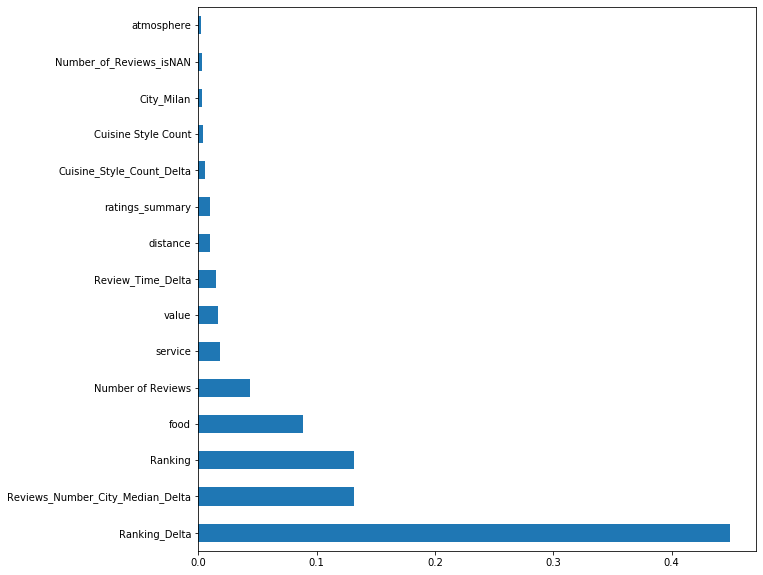

In [199]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [200]:
test_data.sample(10)

Ranking  Price Range  Number of Reviews  Rating  \
477  -0.975941          1.0           1.081255     0.0   
3167 -0.257692          2.0          -0.264029     0.0   
5485  1.002489          2.0          -0.400305     0.0   
3968  0.165524          2.0           0.067924     0.0   
2051  1.330245          2.0          -0.382833     0.0   
8620 -0.947276          2.0           0.316016     0.0   
3722  0.245299          1.0          -0.257040     0.0   
47    0.053027          2.0           0.095878     0.0   
7484 -0.936729          2.0           0.784245     0.0   
9360  1.089566          2.0          -0.333914     0.0   

      Number_of_Reviews_isNAN  Price_Range_isNAN  Cuisine Style Count  \
477                         0                  0                    4   
3167                        0                  0                    4   
5485                        0                  1                    1   
3968                        0                  0                    2   
2051                        0                  1                    1   
8620                        0                  0                    5   
3722                        0                  0                    2   
47                          0                  0                    2   
7484                        0                  0                    3   
9360                        0                  1                    1   

      Cuisine_Style_isNAN  Cuisine_Cafe  Cuisine_Greek  ...  is_verified  \
477                     0             0              0  ...          0.0   
3167                    0             0              0  ...          0.0   
5485                    1             0              0  ...          0.0   
3968                    0             0              0  ...          0.0   
2051                    1             0              0  ...          0.0   
8620                    0             0              0  ...          0.0   
3722                    0             0              0  ...          0.0   
47                      0             0              0  ...          0.0   
7484                    0             0              0  ...          0.0   
9360                    1             0              0  ...          0.0   

      has_phone_number  has_hours  has_website  has_menu  distance  \
477                1.0        1.0          1.0       0.0  0.523437   
3167               0.0        0.0          0.0       0.0 -1.222979   
5485               1.0        1.0          1.0       0.0  0.620460   
3968               1.0        1.0          1.0       0.0  0.135345   
2051               1.0        1.0          1.0       0.0 -0.058701   
8620               1.0        1.0          1.0       0.0  0.038322   
3722               1.0        1.0          1.0       0.0 -0.155724   
47                 1.0        1.0          1.0       0.0 -1.222979   
7484               1.0        1.0          1.0       0.0 -0.058701   
9360               1.0        1.0          1.0       0.0  2.949015   

      has_tcAward  atmosphere  distance_isNAN  ratings_summary  
477           1.0    1.411250               0         1.036214  
3167          0.0   -0.727742               1        -1.402544  
5485          0.0   -0.727742               0        -1.402544  
3968          0.0    1.411250               0         0.962312  
2051          0.0   -0.727742               0        -1.402544  
8620          0.0    1.945998               0         1.405723  
3722          0.0    1.411250               0         1.110116  
47            0.0    0.876502               1         0.445000  
7484          0.0    1.411250               0         0.962312  
9360          0.0   -0.727742               0        -0.072312  

[10 rows x 103 columns]

In [201]:
test_data = test_data.drop(['Rating'], axis=1)

In [202]:
sample_submission

Restaurant_id  Rating
0             id_0     2.0
1             id_1     2.5
2             id_2     4.0
3             id_3     1.0
4             id_4     4.0
...            ...     ...
9995       id_9995     3.0
9996       id_9996     1.5
9997       id_9997     4.5
9998       id_9998     1.0
9999       id_9999     2.5

[10000 rows x 2 columns]

In [203]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [204]:
predict_submission

array([3.085, 4.38 , 4.355, ..., 3.015, 4.135, 4.34 ])

In [205]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

ValueError: Length of values does not match length of index

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
